# Spotify classification problem 

In [63]:
import pandas as pd 
import numpy as np

In [10]:
#Reading Both Datasets
Train = pd.read_csv("classification_train.csv")
Test = pd.read_csv("classificationtest.csv")

# Data Analysis

In [11]:
print ( "Shape of train dataset:",Train.shape )
print ( "Shape of test dataset:",Test.shape )

Shape of train dataset: (453, 15)
Shape of test dataset: (113, 14)


In [12]:
print("Info of Train:",Train.info()) 
print("Info of Test:",Test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB
Info of Train: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  ------

In [16]:
Train.head()# Displaying first 5 records of Train data

Id                                        title            artist  year  \
0   1                                 My Happiness    Connie Francis  1996   
1   2                             Unchained Melody   The Teddy Bears  2011   
2   3                        How Deep Is Your Love          Bee Gees  1979   
3   4                                Woman in Love  Barbra Streisand  1980   
4   5  Goodbye Yellow Brick Road - Remastered 2014        Elton John  1973   

   bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop        top genre  
0  107    31    45  -8    13   28  150     75     3   44  adult standards  
1  114    44    53  -8    13   47  139     49     3   37              NaN  
2  105    36    63  -9    13   67  245     11     3   77  adult standards  
3  170    28    47 -16    13   33  232     25     3   67  adult standards  
4  121    47    56  -8    15   40  193     45     3   63        glam rock

In [15]:
Test.head()# Displaying first 5 records of Test data

Id                                              title  \
0  454                                            Pump It   
1  455  Circle of Life - From "The Lion King"/Soundtra...   
2  456             We Are The Champions - Remastered 2011   
3  457                              Insomnia - Radio Edit   
4  458                                This Eve of Parting   

                artist  year  bpm  nrgy  dnce  dB  live  val  dur  acous  \
0  The Black Eyed Peas  2005  154    93    65  -3    75   74  213      1   
1           Elton John  1994  161    39    30 -15    11   14  292     26   
2                Queen  1977   64    46    27  -7    12   18  179     38   
3            Faithless  2010  127    92    71  -9    37   53  216      6   
4        John Hartford  2018  115    46    56 -12    21   34  153     18   

   spch  pop  
0    18   72  
1     3   59  
2     3   76  
3     4   50  
4     3   44

In [17]:
# checking for duplicate values

print('Train data duplicated:',Train.duplicated().any())
print('Test data duplicated:',Test.duplicated().any())

# There are no duplicate values in both Train and Test Data set.

Train data duplicated: False
Test data duplicated: False


In [18]:
# check if any NaN cell in both train and test data 
print('Train data NaN:',Train.columns[Train.isnull().any()])
print('Test data NaN:',Test.columns[Test.isnull().any()])

Train data NaN: Index(['top genre'], dtype='object')
Test data NaN: Index([], dtype='object')


In [21]:
# null value count from top genre attribute
column = 'top genre'
null_mask = Train[column].isnull()
null_count = null_mask.sum()
print(f'"{column}" has {null_count} null values.')

# 15 null values in the Train, NO null values in Test

"top genre" has 15 null values.


In [24]:
#Dropping Null values from top genre
if not(Train.columns[Train.isnull().any()].isnull()):
    Train = Train.drop(Train[Train['top genre'].isnull()].index)
Test = Test.copy()

# check if any NaN cell in both train and test data after removal
print('After NaN removal in train:',Train.columns[Train.isnull().any()])
print('Test data NaN:',Test.columns[Test.isnull().any()])

After NaN removal in train: Index([], dtype='object')
Test data NaN: Index([], dtype='object')


C:\Users\Shiva\AppData\Local\Temp\ipykernel_8280\3727919299.py:2: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not(Train.columns[Train.isnull().any()].isnull()):


In [25]:
Train.describe()

Id         year         bpm        nrgy        dnce  \
count  438.000000   438.000000  438.000000  438.000000  438.000000   
mean   227.600457  1990.881279  118.326484   60.504566   59.780822   
std    130.463047    16.697047   25.175735   22.089660   15.404757   
min      1.000000  1948.000000   62.000000    7.000000   18.000000   
25%    116.250000  1976.000000  100.000000   44.000000   50.000000   
50%    226.500000  1993.000000  120.000000   64.000000   62.000000   
75%    340.750000  2006.000000  133.000000   78.000000   70.750000   
max    453.000000  2019.000000  199.000000  100.000000   96.000000   

               dB        live         val         dur       acous        spch  \
count  438.000000  438.000000  438.000000  438.000000  438.000000  438.000000   
mean    -8.787671   17.605023   59.625571  228.267123   32.191781    5.671233   
std      3.591005   13.807492   24.480160   63.426812   29.279912    5.571392   
min    -24.000000    2.000000    6.000000   98.000000    0.000000    2.000000   
25%    -11.000000    9.000000   42.250000  184.500000    7.000000    3.000000   
50%     -8.000000   13.000000   61.000000  224.000000   23.000000    4.000000   
75%     -6.000000   23.000000   80.000000  264.000000   57.000000    6.000000   
max     -1.000000   93.000000   99.000000  511.000000   99.000000   47.000000   

              pop  
count  438.000000  
mean    61.557078  
std     12.759353  
min     26.000000  
25%     54.000000  
50%     64.000000  
75%     72.000000  
max     84.000000

In [26]:
Test.describe()

Id         year         bpm        nrgy        dnce  \
count  113.000000   113.000000  113.000000  113.000000  113.000000   
mean   510.415929  1990.646018  122.778761   61.017699   58.973451   
std     33.187973    16.611055   26.021878   23.003099   15.079231   
min    454.000000  1945.000000   64.000000    6.000000   26.000000   
25%    482.000000  1978.000000  106.000000   44.000000   50.000000   
50%    510.000000  1991.000000  121.000000   61.000000   58.000000   
75%    539.000000  2006.000000  137.000000   80.000000   69.000000   
max    567.000000  2019.000000  191.000000   98.000000   94.000000   

               dB        live         val         dur       acous        spch  \
count  113.000000  113.000000  113.000000  113.000000  113.000000  113.000000   
mean    -8.911504   20.247788   58.628319  226.212389   31.185841    6.283186   
std      3.933731   16.815454   24.234787   60.903092   30.075366    6.620408   
min    -22.000000    2.000000   11.000000  112.000000    0.000000    3.000000   
25%    -11.000000   10.000000   39.000000  184.000000    5.000000    3.000000   
50%     -8.000000   14.000000   62.000000  215.000000   20.000000    4.000000   
75%     -6.000000   24.000000   80.000000  264.000000   51.000000    6.000000   
max     -1.000000   90.000000   98.000000  444.000000   97.000000   47.000000   

              pop  
count  113.000000  
mean    62.575221  
std     11.937939  
min     27.000000  
25%     56.000000  
50%     65.000000  
75%     71.000000  
max     83.000000

# Data Visualization & Pre-processing

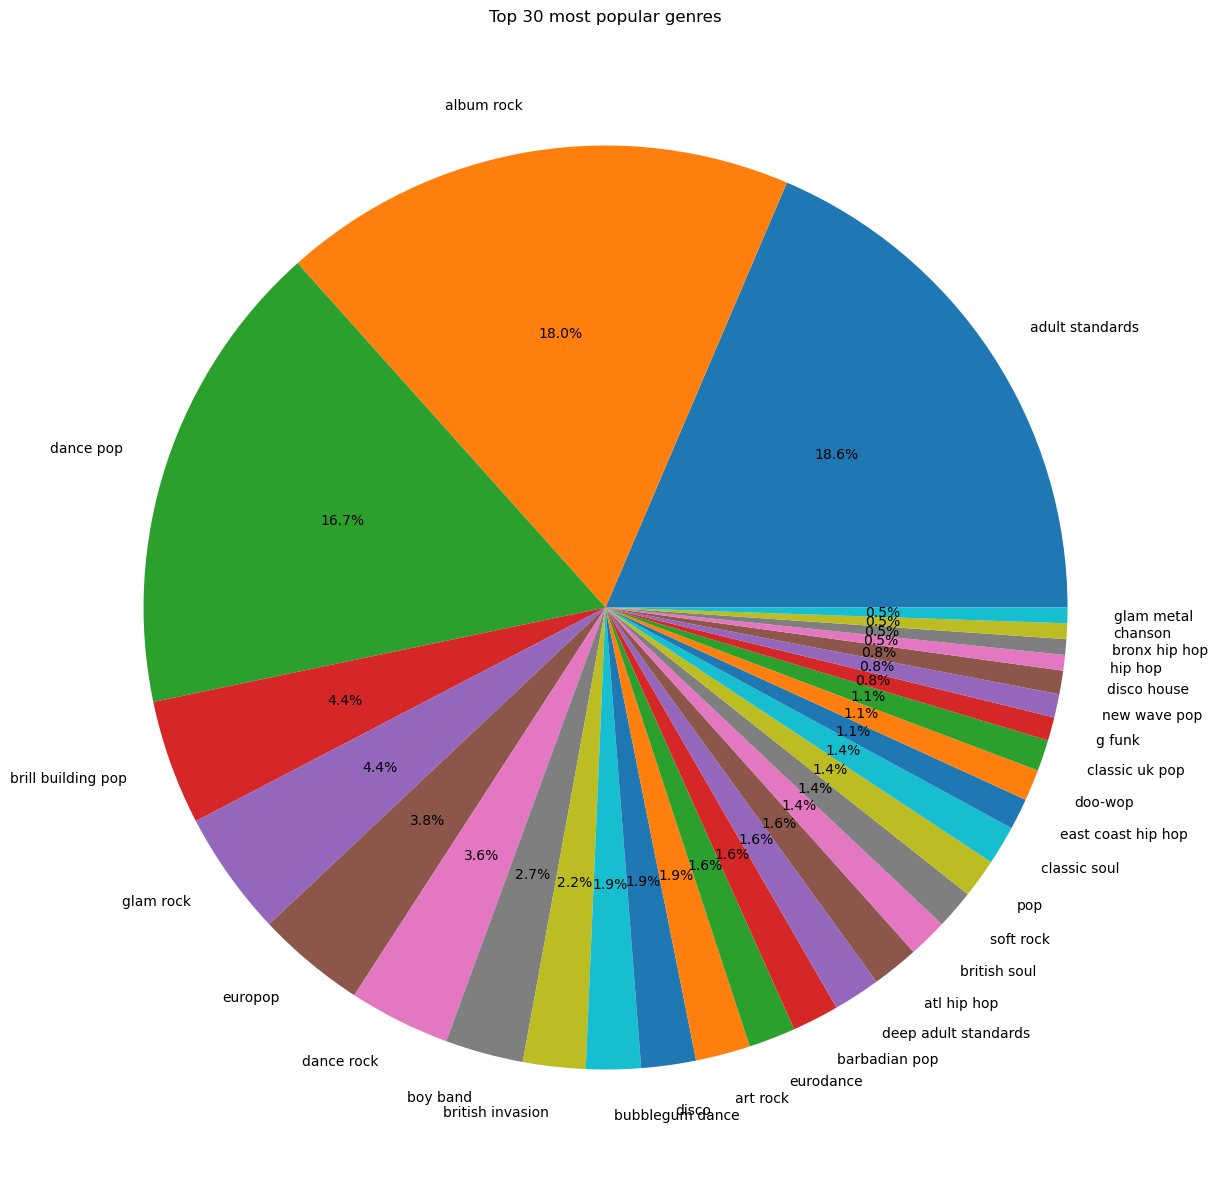

In [29]:
#checking for the most popular genres before encoding as it will label the categorical values after encoding
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 15))
ax = fig.subplots()
Train['top genre'].value_counts()[:30].plot(ax=ax, kind = "pie",autopct='%1.1f%%')
ax.set_ylabel("")
ax.set_title("Top 30 most popular genres")
plt.show()

## We can see that-> 'adult standards','album rock' and 'dance pop' contribute with a higher percent of total top genres
## with 18.6%, 18% and 16.7% respectively. These genres are the most popular 

In [30]:
Train.groupby('top genre').size().sort_values(ascending=False)

top genre
adult standards       68
album rock            66
dance pop             61
glam rock             16
brill building pop    16
                      ..
canadian folk          1
classic danish pop     1
classic girl group     1
country                1
yodeling               1
Length: 86, dtype: int64

In [32]:
# function to loop through given list and encode all item inside
from sklearn.preprocessing import StandardScaler,LabelEncoder
encoder = LabelEncoder()
def labelEncodeFunc(Ds,encodeCols):
    for col in encodeCols:
        encoder.fit(Ds[col])
        Ds[col] = encoder.transform(Ds[col])

In [33]:
#label encoding instead of one hot encoder as it results in multicollinearity among the variables,
#which reduces the model's accuracy.
encodeCols = ["title","artist","top genre"]

labelEncodeFunc(Train,encodeCols)
    
print("after encode info of Train:",Train.info())
print("after encode info of Test:",Test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         438 non-null    int64
 1   title      438 non-null    int32
 2   artist     438 non-null    int32
 3   year       438 non-null    int64
 4   bpm        438 non-null    int64
 5   nrgy       438 non-null    int64
 6   dnce       438 non-null    int64
 7   dB         438 non-null    int64
 8   live       438 non-null    int64
 9   val        438 non-null    int64
 10  dur        438 non-null    int64
 11  acous      438 non-null    int64
 12  spch       438 non-null    int64
 13  pop        438 non-null    int64
 14  top genre  438 non-null    int32
dtypes: int32(3), int64(12)
memory usage: 49.6 KB
after encode info of Train: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  ------------

# Outliers Detection

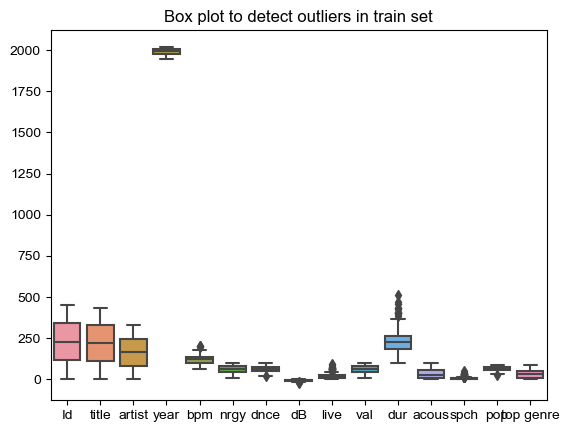

In [34]:
import matplotlib.pyplot as plt
plt.title("Box plot to detect outliers in train set")
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(20,30)})
sns.boxplot(data= Train)
plt.show()

<Axes: title={'center': 'Box plot for attribute live'}, xlabel='live'>

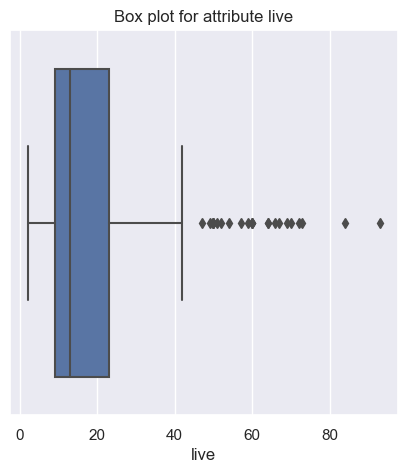

In [36]:
# Attributes like live,Spch has outliers, 
plt.title("Box plot for attribute live")
#sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x=Train['live'])

<Axes: title={'center': 'Box plot for attribute spch'}, xlabel='spch'>

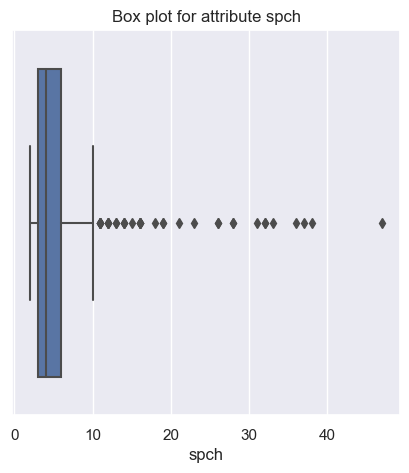

In [37]:
plt.title("Box plot for attribute spch")
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(x=Train['spch'])

Text(0.5, 1.0, 'Corelation of all columns - before')

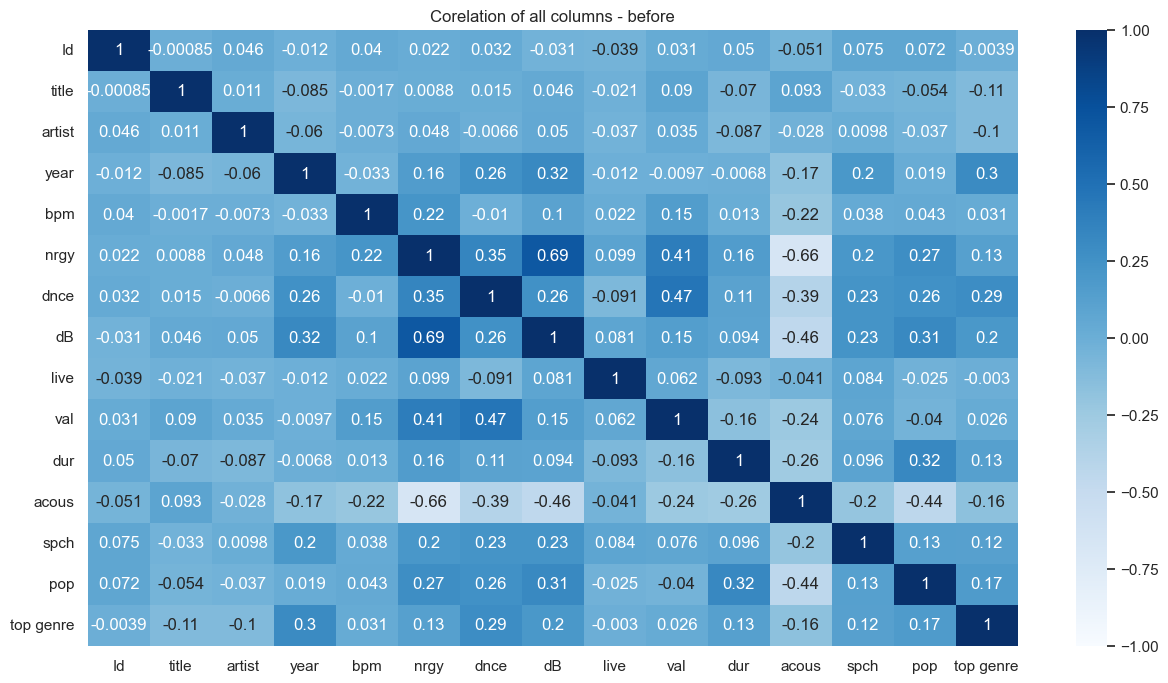

In [38]:
# corelation before removal of outliers for train data
corelation = Train.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(Train.corr(), center=0, cmap='Blues',vmin=-1, vmax=1, annot=True)
ax.set_title('Corelation of all columns - before')

In [39]:
# filter the outlier of each columns in train data 
th = 5
outlinerList={}
outlinerCols = Train.columns
for col in outlinerCols:
    mean = np.mean(Train[col])
    std=np.std(Train[col])
    out_list=[]
    for i in Train[col]:
        z=(i-mean)/std
        if z > th:
            out_list.append(i)
    if (out_list):
        outlinerList[col]= out_list
print("outliers : ", outlinerList)

outliers :  {'live': [93], 'spch': [38, 37, 36, 47]}


In [40]:
# extract outliers in the dataframe and present the shape of dataframe before and after extraction

print("Before remove outliner:",Train.shape)
for key,value in outlinerList.items():
    print(key,value)
    for i in value:
        Train.drop(Train[Train[key]==i].index, inplace = True)

print("After remove outliner:",Train.shape)

Before remove outliner: (438, 15)
live [93]
spch [38, 37, 36, 47]
After remove outliner: (433, 15)


Text(0.5, 1.0, 'Corelation of all columns - after')

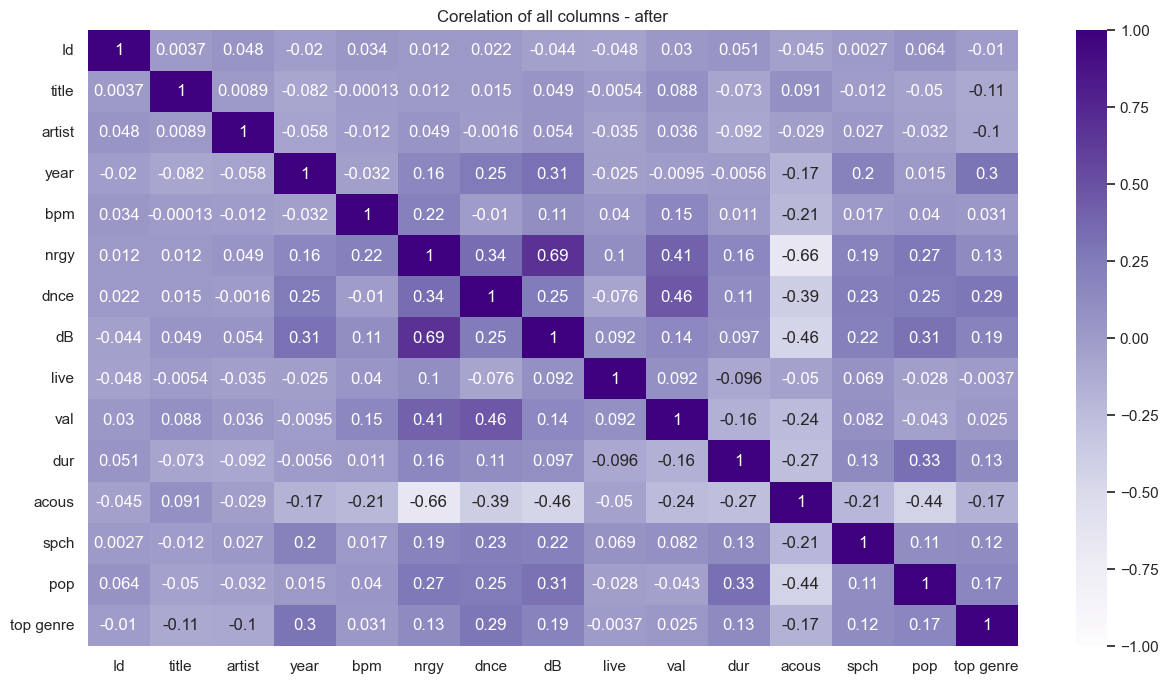

In [41]:
# corelation After remove outlier - train data
corelation = Train.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(Train.corr(), center=0, cmap='Purples',vmin=-1, vmax=1, annot=True)
ax.set_title('Corelation of all columns - after')

<Axes: xlabel='dB', ylabel='nrgy'>

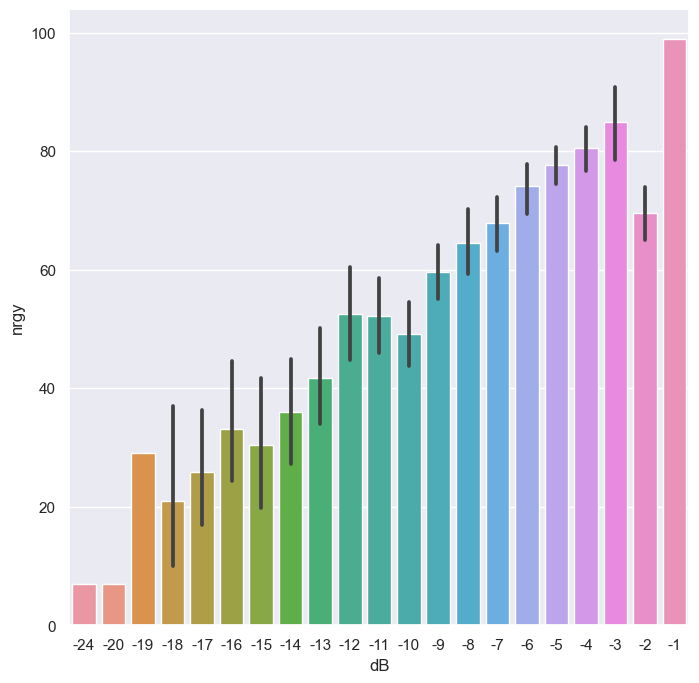

In [46]:
#Barplot for attribute dB and nrgy (which has highest postive correlation)
sns.set(rc = {'figure.figsize': (8,8)})
sns.barplot(data = Train, x="dB", y="nrgy" )
#The below shows that as dB and nrgy are directly proportional to each other. As the dB increases, nrgy increases.

C:\Users\Shiva\AppData\Local\Temp\ipykernel_8280\1782868068.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = Train, x="year", y="nrgy",shade=True )


<Axes: xlabel='year', ylabel='nrgy'>

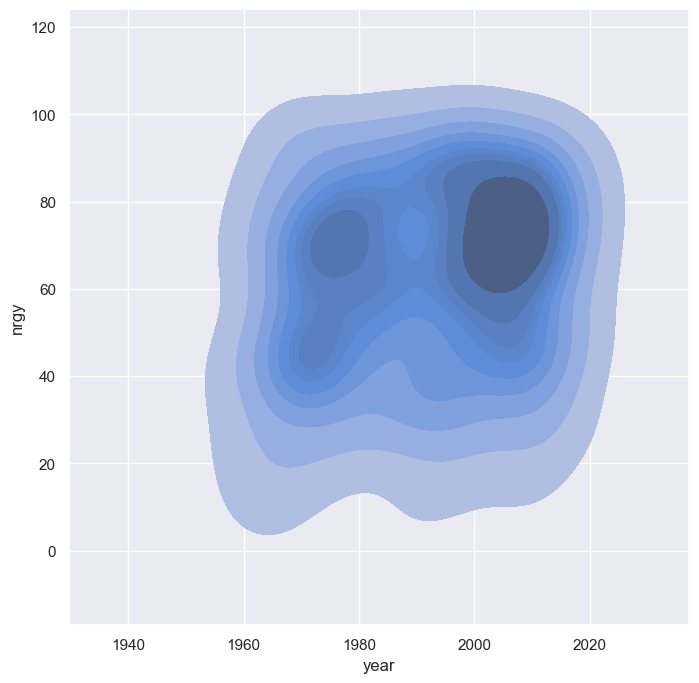

In [51]:
# plot year and nrgy
sns.set(rc = {'figure.figsize': (8,8)})
sns.kdeplot(data = Train, x="year", y="nrgy",shade=True )
# nrgy levels were maximum or highest during the years between 2000 to 2020. And there is a slight decrease between 1970 to 1980

<Axes: xlabel='dB', ylabel='nrgy'>

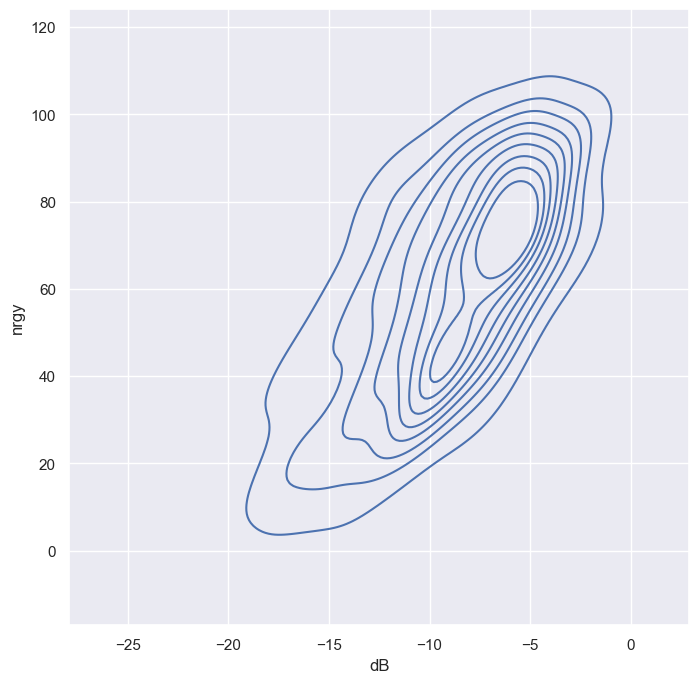

In [53]:
# plot for DB & nrgy
sns.set(rc = {'figure.figsize': (8,8)})
sns.kdeplot(data = Train, x="dB", y="nrgy" )
#This plot represents the corelation between dB and nrgy which is same as the above barplot but is more concentrated between dB -10 and -5 and increases as the nrgy increases.

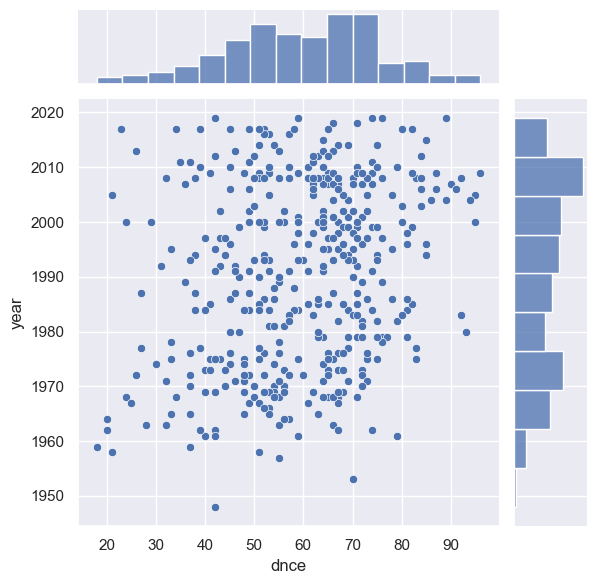

In [56]:
#Joint plot for dnce and year
sns.jointplot(x='dnce', y= 'year', data = Train)
#below jointplot identifies the trends between year and dnce. The result shows they are evenly distribured throughout.

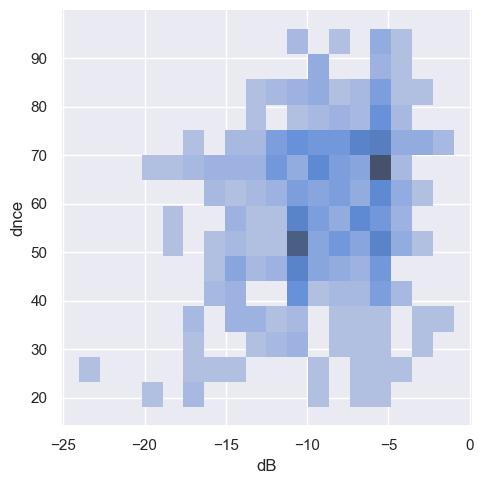

In [59]:
sns.displot(data=Train, x="dB", y="dnce")
#The displot shows data is more concentrated near dB -5 and dnce close to 70.

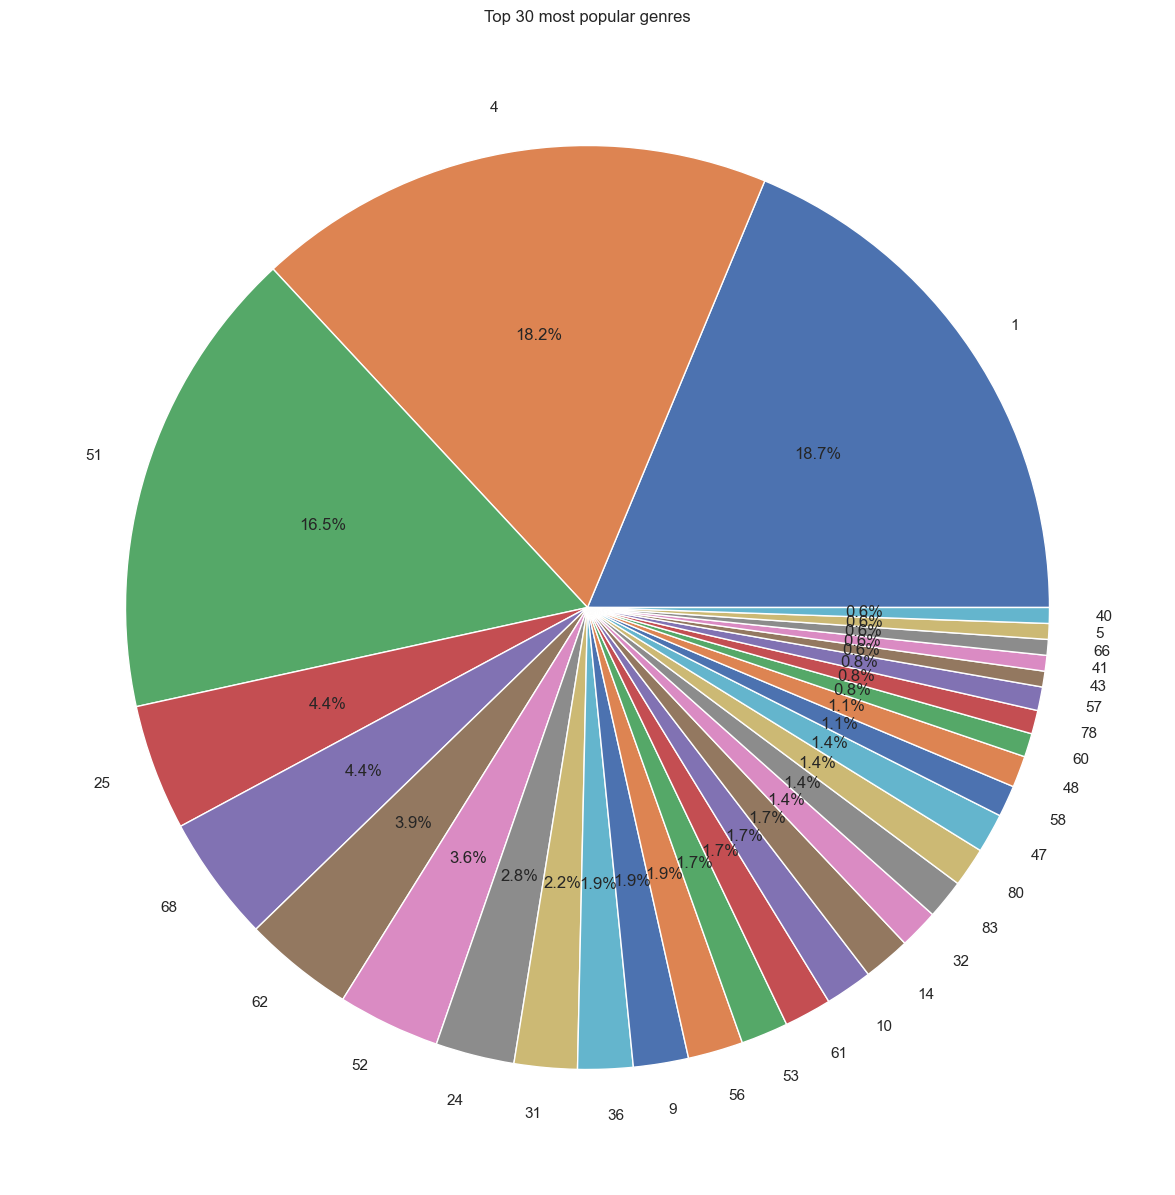

In [61]:
#top genre pie chart after encoding of genres
fig = plt.figure(figsize = (15, 15))
ax = fig.subplots()
Train['top genre'].value_counts()[:30].plot(ax=ax, kind = "pie",autopct='%1.1f%%')
ax.set_ylabel("")
ax.set_title("Top 30 most popular genres")
plt.show()

In [62]:
import plotly.express as px   #importing plotly
fig2 = px.scatter(Train, x="pop", y="dnce", color="dnce",size='pop')
fig2.show()